In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# 군집 알고리즘

* 군집 : 비슷한 샘플끼리 그룹으로 모으는 작업
* 군집 알고리즘에서 만든 그룹을 클러스터(cluster) 라고 한다.

## 타겟값을 알고있는 알고리즘


## 데이터 준비하기

In [2]:
# 사과 바나나 파인애플이 각각 100개씩 있음
fruits = np.load("fruits_300.npy")

In [3]:
# 샘플의 개수(샘플의 높이), 이미지의 세로, 이미지의 가로
fruits.shape

(300, 100, 100)

In [4]:
# 첫번째 행
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

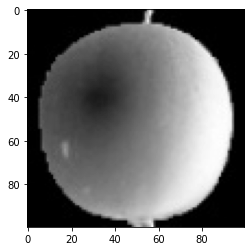

In [5]:
plt.imshow(fruits[0], cmap="gray")
plt.show()

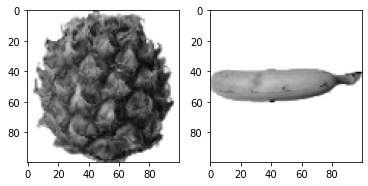

In [6]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap="gray_r")
axs[1].imshow(fruits[200], cmap="gray_r")
plt.show()

## 픽셀값 분석하기

In [7]:
# 100X100 이미지를 1X10000 로 바꾸기
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(fruits.shape)
print(apple.shape, pineapple.shape, banana.shape)

(300, 100, 100)
(100, 10000) (100, 10000) (100, 10000)


### 이미지당 픽셀 평균

In [48]:
# apple pineapple, banana 이미지의 픽셀 평균값

# 사과 이미지 100장의 평균
print(apple.mean(axis=1))

# 파인애플 이미지 100장의 평균
print(pineapple.mean(axis=1))

# 바나나 이미지 100장의 평균
print(banana.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]
[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96

* 히스토그램

x축 구간, y축 빈도

(array([21., 21., 27., 11.,  9.,  4.,  5.,  0.,  1.,  1.]),
 array([18.568  , 24.79665, 31.0253 , 37.25395, 43.4826 , 49.71125,
        55.9399 , 62.16855, 68.3972 , 74.62585, 80.8545 ]),
 <BarContainer object of 10 artists>)

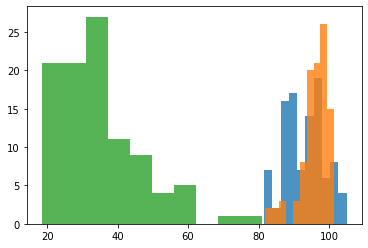

In [9]:
plt.hist(np.mean(apple,axis=1), alpha=0.8)
plt.hist(np.mean(pineapple,axis=1), alpha=0.8)
plt.hist(np.mean(banana,axis=1), alpha=0.8)

* 바나나의 값의 평균이 작은것을 확인할 수 있음
* 이는 바나나는 사진의 대부분이 빈칸이라 0 인 값이 많음

### 각 필셀당 100개 이미지의 평균

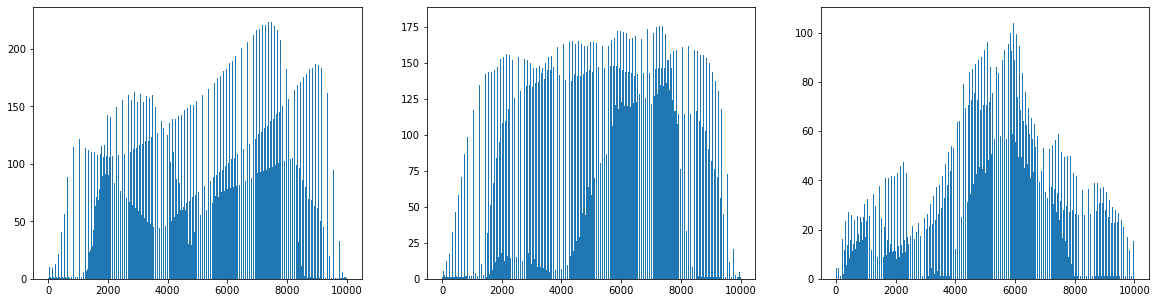

In [10]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

In [11]:
# 다시 2차원으로 전환
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean =np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

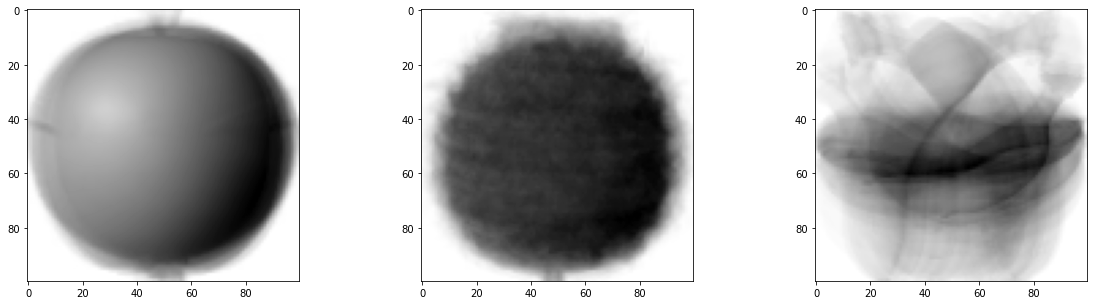

In [12]:
# 그림으로 출력
# 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 이미지
fig, axs = plt.subplots(1,3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap="gray_r")
axs[1].imshow(pineapple_mean, cmap="gray_r")
axs[2].imshow(banana_mean, cmap="gray_r")
plt.show()

## 평균값과 가까운 사진 고르기

* 사과 사진의 평균값인 apple_mean과 가장 가까운 사진 고르기

* 절대값 오차를 사용

* fruits 배열에 있는 모든 샘플에서 apple_mean 을 뺀 절대값의 평균을 계산

In [13]:
# 절댓값
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape) # 각 샘플의 오차 평균

(300,)


In [14]:
# 오차 평균값이 가장 작은 순서대로 100개
# np.argsort() 는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환
# 100개를 선택하여 10X10 격자로 그래프를 생성

apple_index = np.argsort(abs_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42],
      dtype=int64)

### 10X10 그림 그리기

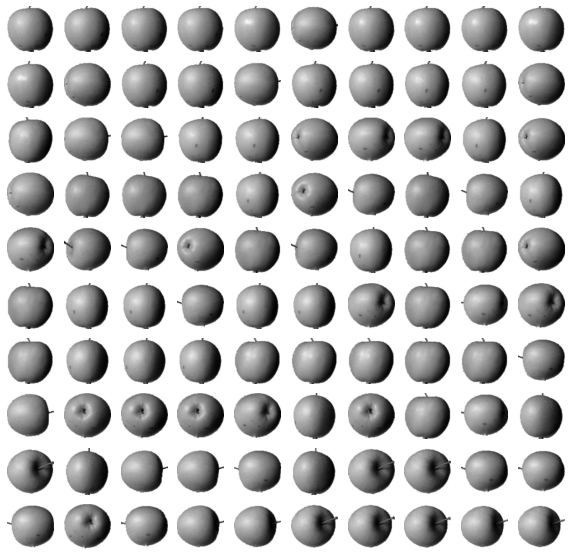

In [17]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap="gray_r")
        axs[i, j].axis("off") # 좌표축 그리지 않기
plt.show()

# K-평균

* **타겟을 모르는 알고리즘**

* 평균값을 자동으로 찾아준다.
* 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심, 센트로이드(centroid)라고 부른다

In [18]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

## 클러스터링 n=3

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
km.labels_ # n_clusters = 3 으로 지정했기 때문에 숫자가 0,1,2 만 나옴

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

* 0, 1, 2 샘플 개수 확인

In [23]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

* 각 클러스터가 모은 이미지

## 10개씩 그리기 함수() 만들기

In [5]:
import matplotlib.pyplot as plt

# draw_fruits() 샘플개수, 너비, 높이를 입력받아 가로 10개씩 이미지를 출력
# 샘플 개수에 따라 행과 열의 개수를 계산하고 figszie를 지정
# figsize 는 ratio 매개변수에 따라 커짐, 기본값 1


def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 개수
    
    # 한줄에 10개씩
    rows = int(np.ceil(n/10))
    
    # 행이 1개면 열의 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j <n: # 최대 n개
                axs[i, j].imshow(arr[i*10 + j], cmap="gray_r")
            axs[i,j].axis("off")
    
    plt.show()

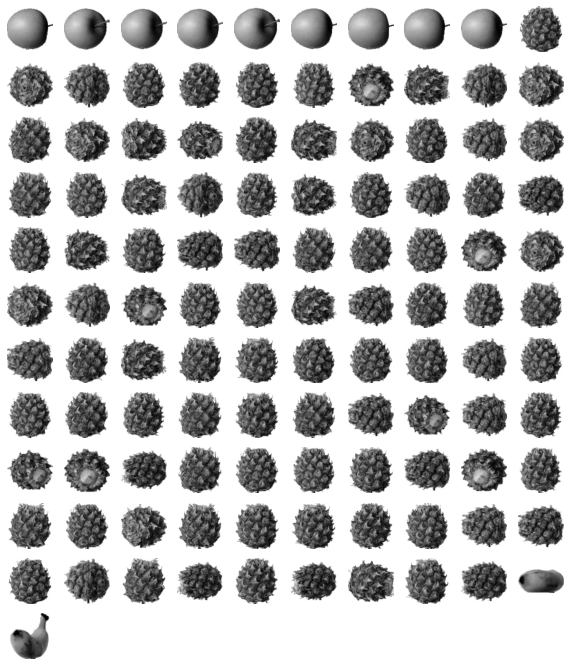

In [29]:
# km.labels_ 을 통해 0 인 값은 True, 0이 아니면 False
# 여기서 True 만을 보여줌

draw_fruits(fruits[km.labels_==0])

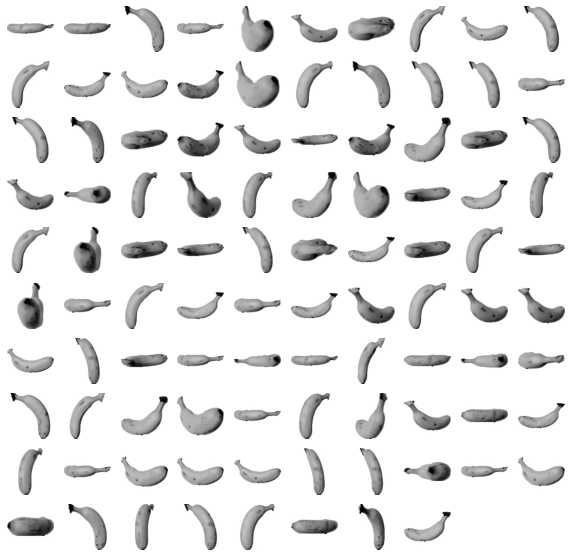

In [30]:
draw_fruits(fruits[km.labels_==1])

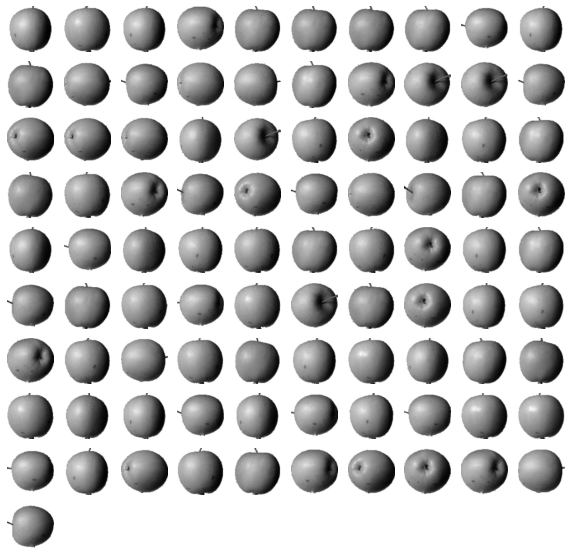

In [31]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

* KMeans 클래스는 클러스터 중심을 `cluster_centers_` 속성에 저장되어 있다.

* fruits_2d 샘플의 클러스터 중심이기때문에 이미지로 출력하려면 100X100 크기의 2차원 배열로 바꿔야한다.

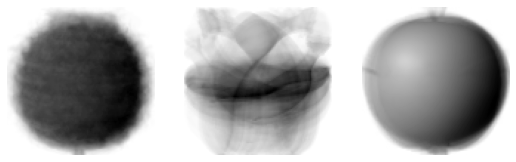

In [34]:

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio =3)

### 샘플에서 클러스터 중심까지 거리

* StandardScaler 클래스 처럼 특성값을 변환하는 도구로 사용할 수 있음

In [41]:
print(km.transform(fruits_2d[100:101]))
# 각각 클러스터와의 거리를 보여줌
# 1번 클러스터와의 거리 3393
# 2번 클러스터와의 거리 8837
# 3번 클러스터와의 거리 5267

## 즉 1번 클러스터와 가장 가까운것을 알 수 있음

[[3393.8136117  8837.37750892 5267.70439881]]


### 예측된 샘플

In [42]:
print(km.predict(fruits_2d[100:101]))

[0]


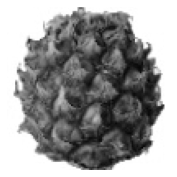

In [45]:
draw_fruits(fruits[100:101], ratio=3)

### 클러스터가 움직인 횟수

In [47]:
# 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다.
# 이때 클러스터가 움직인 횟수
print(km.n_iter_)

4



### 최적의 K 값 찾기

`km.inertia_` 를 활용


* 적절한 클러스터 갯수를 찾는 방법 엘보우 `elbow` 방법
* 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합 - 이너셔 `inertia`
* 즉 `inertia` 이너셔는 클러스터의 샘플이 얼마나 가까운가 의 값

> * 여기서 클러스터의 갯수를 증가시켜 가면서 이너셔의 변화를 관찰
> * 이너셔가 급격히 꺽기는 점을 확인
> * 이 지점 이후로는 클러스터의 갯수를 늘려도 잘 개선되지 않음

* 마치 이 모양이 엘보우 모양이라고 하여 엘보우 방법

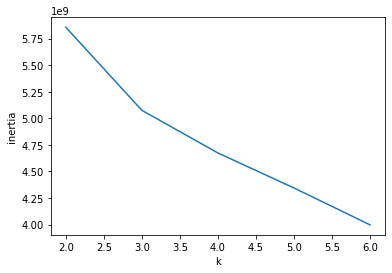

In [49]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

* 여기서는 명확하게 보이지는 않지만 k = 3 일때 기울기가 약간 바뀌는 것을 확인할 수 있다.

# 주성분 분석

`sklearn.decomposition 의 PCA`

`from sklearn.decomposition import PCA`

* 키워드 : 차원축소, 주성분 분석, principal component analysis, PCA, 설명된 분산


* 데이터를 가장 잘 나타내는 특성 - 분산이 큰 방향의 특성

In [1]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

* PCA 객체를 만들때 주성분의 개수를 지정해야 한다.


* K-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 target 값은 없다.


* PCA로 찾은 100X100 데이터는 주성분개수, 10000 개로 돌아온다.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분의 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


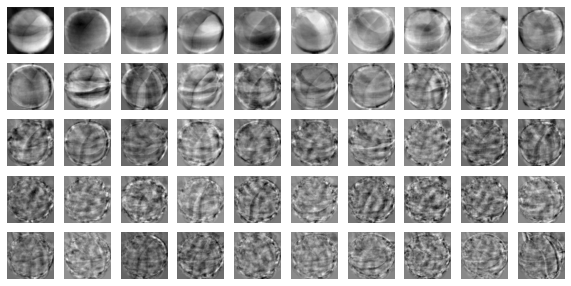

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100)) # 50개의 특성의 차원

## PCA 클래스 - 차원축소
주성분을 찾아 원본 데이터를 주성분에 투영하여 특성을 10000개에서 50개로 줄인다

In [8]:
print(fruits_2d.shape) # 300개의 과일 특성 10000개

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 300개의 과일 특성 50개

(300, 50)


### 원본 데이터 재구성

`pca.inverse_transform()`

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) # 50개 특성을 다시 10000개로

(300, 10000)


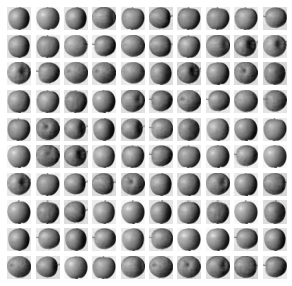

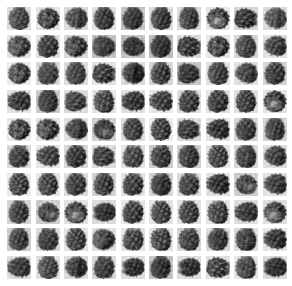

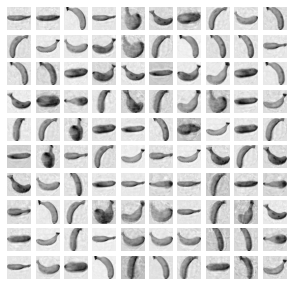

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100], ratio=0.5)
    print("\n")

### 설명된 분산

* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는가를 나타냄

* PCA 클래스의 `explained_variance_ratio_`에 설명된 분산 비율이 기록되어 있음

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9214896483345318


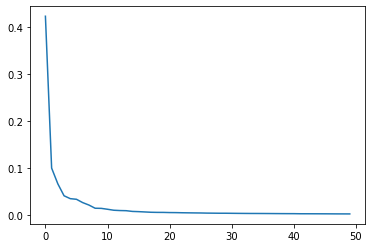

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

* 처음 10개의 주성분이 거의 대부분의 분산을 표현하는 것을 확인 할 수 있다.

## 다른 알고리즘 + PCA

* 간단하게 로지스틱 회귀모델과 함께 사용해보기

### 로지스틱 회귀모델

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [22]:
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 원본 데이터,  교차검증

In [25]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
# 테스트 점수, 특성이 많기 때문에 과대적합 되기 쉬움 
print(np.mean(scores["fit_time"]))
# 테스트에 걸리는 시간

0.9966666666666667
0.605543565750122


#### 차원축소

In [26]:
pca = PCA(n_components=0.5)
# 개수를 지정하는것이 아닌 설명된 분산의 비율을 입력할 수도 있음
# 지정한 비율에 도달할 때까지 자동으로 주성분의 개수를 찾음
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [28]:
print(pca.n_components_)
# 주성분 2개를 반환

2


In [31]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 300개 x 주성분 2개 의 shape 를 띄고 있음

(300, 2)


#### 차원축소 데이터, 교차검증

In [36]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"])) # 0.9933
print(np.mean(scores["fit_time"])) # 0.0705

# 아래의 경고는 회귀모델이 완전히 수렴한것이 아니므로 반복횟수를 증가하라는 경고
# 하지만 교차검증의 결과가 충분히 좋기 때문에 무시해도 된다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334
0.07892756462097168


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

* 회귀에 걸리는 시간을 8~10 배를 줄이면서 점수는 고득점을 유지할 수 있다.

---
### 군집 분석

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


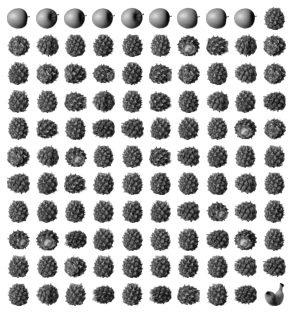

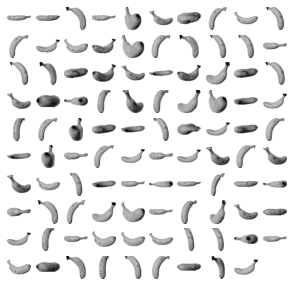

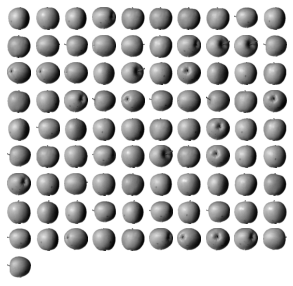

In [38]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label], ratio=0.5)
    print("\n")

### 클러스터별 산점도 그리기

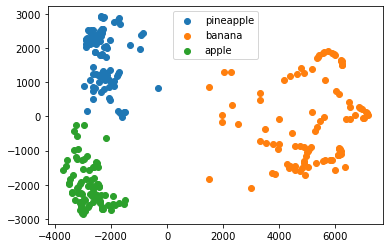

In [44]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(["pineapple","banana","apple"])
plt.show()